In [1]:
using XLSX
using DataFrames
using CSV
using GLM
using Statistics
using CovarianceMatrices
using Plots

# 2.2 (Table 1)

In [2]:
data = XLSX.readtable("adj_database_anomalies_2023_.xlsx", "Sheet1")
df = DataFrame(data)
first(df, 10)

Row,DATE,short_ACC,long_ACC,diff_ACC,short_AG,long_AG,diff_AG,long_GP,short_GP,diff_GP,Sentiment,Mkt-RF,SMB,HML,RF
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1964-07-31,0.0703521,-0.00682161,-0.0771737,missing,missing,missing,0.0205976,0.0186037,0.00199396,missing,0.0174,0.0028,0.0068,0.003
2,1964-08-31,0.0140886,-0.00651656,-0.0206051,missing,missing,missing,-0.0175253,0.00280018,-0.0203255,missing,-0.0144,0.0009,0.0009,0.0028
3,1964-09-30,0.0542374,0.0566842,0.00244684,missing,missing,missing,0.0283798,0.0342362,-0.0058564,missing,0.0269,-0.0051,0.0165,0.0028
4,1964-10-31,0.0314791,0.0703296,0.0388505,missing,missing,missing,0.0188798,0.00999385,0.00888599,missing,0.0059,0.0043,0.0114,0.0029
5,1964-11-30,0.010131,0.0336643,0.0235333,missing,missing,missing,0.00767695,0.00284112,0.00483583,missing,0.0,0.0061,-0.0198,0.0029
6,1964-12-31,0.00234142,0.0050075,0.00266608,missing,missing,missing,0.00097719,-0.0185291,0.0195063,missing,0.0003,-0.0026,-0.0255,0.0031
7,1965-01-31,0.045527,0.0583703,0.0128433,missing,missing,missing,0.0665486,0.0748567,-0.00830812,missing,0.0354,0.027,0.0018,0.0028
8,1965-02-28,0.0191677,0.0805864,0.0614187,missing,missing,missing,0.0272322,0.0348371,-0.00760487,missing,0.0044,0.0348,0.0022,0.003
9,1965-03-31,-0.00254176,0.0230545,0.0255963,missing,missing,missing,0.000643826,0.00848355,-0.00783972,missing,-0.0134,0.0179,0.0109,0.0036


In [3]:
df.Sentiment_1 = lag(df.Sentiment, 1)
rename!(df, "Mkt-RF" => "MktRF");

In [4]:
# Desde enero de 1966
# df = df[19:522, :]

# Desde julio de 1968
df = df[49:522, :];

In [5]:
transform!(df, names(df) .=> ByRow(identity), renamecols=false)
df.ones = ones(nrow(df));

In [6]:
first(df, 10)

Row,DATE,short_ACC,long_ACC,diff_ACC,short_AG,long_AG,diff_AG,long_GP,short_GP,diff_GP,Sentiment,MktRF,SMB,HML,RF,Sentiment_1,ones
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1968-07-31,-0.0870438,-0.00656996,0.0804739,-0.0579115,-0.0242903,0.0336212,-0.0534299,-0.0275608,-0.0258691,0.545508,-0.0272,-0.013,0.0548,0.0048,0.31597,1.0
2,1968-08-31,0.0136057,0.0377,0.0240943,0.0214146,0.0484477,0.0270331,0.0344954,0.0314483,0.00304705,0.689873,0.0134,0.0234,0.01,0.0042,0.545508,1.0
3,1968-09-30,0.0891674,0.120997,0.0318296,0.0691735,0.078126,0.00895242,0.0621499,0.0733897,-0.0112398,0.877197,0.0403,0.0276,0.0023,0.0043,0.689873,1.0
4,1968-10-31,-0.0149918,0.00741407,0.0224059,-0.00846607,0.00146944,0.00993551,0.0116994,-0.000632477,0.0123318,1.30121,0.0042,-0.0047,0.0289,0.0044,0.877197,1.0
5,1968-11-30,0.0720349,0.0950143,0.0229794,0.0794936,0.0633427,-0.0161509,0.0603147,0.0694298,-0.00911509,1.39424,0.0543,0.0235,-0.009,0.0042,1.30121,1.0
6,1968-12-31,-0.00554068,0.0197178,0.0252585,-0.000996727,0.0378652,0.0388619,-0.013891,0.0192688,-0.0331598,2.14558,-0.0394,0.0344,0.0002,0.0043,1.39424,1.0
7,1969-01-31,-0.0110887,-0.0136595,-0.00257079,-0.0229275,-0.00355325,0.0193742,-0.023886,-0.00618896,-0.0176971,2.02692,-0.0125,-0.0078,0.0169,0.0053,2.14558,1.0
8,1969-02-28,-0.0926015,-0.112813,-0.0202118,-0.108441,-0.104278,0.00416204,-0.0800646,-0.100138,0.0200737,1.95348,-0.0584,-0.0389,0.0091,0.0046,2.02692,1.0
9,1969-03-31,0.00410858,0.0106231,0.00651454,0.0128178,0.0204457,0.00762786,0.0164684,0.0105848,0.00588353,2.01487,0.0264,-0.0025,-0.0046,0.0046,1.95348,1.0


## Table 1

In [7]:
X = Matrix(DataFrame(X1=df.MktRF, X2=df.SMB, X3=df.HML));

### Total Accruals

#### Long leg

In [8]:
model_1_long_ACC = lm(@formula(long_ACC ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_ACC ~ 1 + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00101561  0.000797956   1.27    0.2037  -0.000552395  0.00258361
MktRF        1.0766      0.0192498    55.93    <1e-99   1.03878      1.11443
SMB          0.806274    0.0253581    31.80    <1e-99   0.756445     0.856103
HML          0.161541    0.0297036     5.44    <1e-07   0.103172     0.219909
───────────────────────────────────────────────────────────────────────────────

$ R_{i, t} = a_i + b \textit{MKT}_t + c \textit{SMB}_t + d \textit{HML}_t + \varepsilon_{i, t} $ </br>
$ a_i + \varepsilon_{i, t} = R_{i, t} - b \textit{MKT}_t - c \textit{SMB}_t - d \textit{HML}_t $ </br>
$ a_i + \varepsilon_{i, t} = R_{i, t} - ( b \textit{MKT}_t + c \textit{SMB}_t + d \textit{HML}_t ) $

In [9]:
β = coef(model_1_long_ACC)[2:end]
ae_long_ACC = df.long_ACC - X * β;

#### Short leg

In [10]:
model_1_short_ACC = lm(@formula(short_ACC ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_ACC ~ 1 + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00382778  0.00088635  -4.32    <1e-04  -0.00556948  -0.00208608
MktRF         1.1328      0.0213822   52.98    <1e-99   1.09079      1.17482
SMB           0.954984    0.0281671   33.90    <1e-99   0.899635     1.01033
HML           0.0799843   0.032994     2.42    0.0157   0.0151503    0.144818
───────────────────────────────────────────────────────────────────────────────

In [11]:
β = coef(model_1_short_ACC)[2:end]
ae_short_ACC = df.short_ACC - X * β;

#### Long minus short

In [12]:
model_1_diff_ACC = lm(@formula(diff_ACC ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_ACC ~ 1 + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00484339  0.000807688   6.00    <1e-08   0.00325626   0.00643052
MktRF        -0.0561998   0.0194846    -2.88    0.0041  -0.0944874   -0.0179122
SMB          -0.14871     0.0256673    -5.79    <1e-07  -0.199147    -0.0982731
HML           0.0815563   0.0300658     2.71    0.0069   0.0224762    0.140636
────────────────────────────────────────────────────────────────────────────────

In [13]:
β = coef(model_1_diff_ACC)[2:end]
ae_diff_ACC = df.diff_ACC - X * β;

### Gross profitability

#### Long leg

In [14]:
model_1_long_GP = lm(@formula(long_GP ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_GP ~ 1 + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000401542  0.000789534   0.51    0.6113  -0.00114991   0.001953
MktRF        1.07792      0.0190466    56.59    <1e-99   1.04049      1.11534
SMB          0.795932     0.0250904    31.72    <1e-99   0.746629     0.845235
HML          0.0094578    0.0293901     0.32    0.7477  -0.0482944    0.06721
──────────────────────────────────────────────────────────────────────────────

In [15]:
β = coef(model_1_long_GP)[2:end]
ae_long_GP = df.long_GP - X * β;

#### Short leg

In [16]:
model_1_short_GP = lm(@formula(short_GP ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_GP ~ 1 + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)   Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00278806   0.000980112  -2.84    0.0046  -0.004714   -0.000862114
MktRF         1.07981      0.0236441    45.67    <1e-99   1.03335     1.12627
SMB           0.905896     0.0311468    29.08    <1e-99   0.844692    0.9671
HML           0.000363702  0.0364843     0.01    0.9921  -0.0713287   0.0720561
─────────────────────────────────────────────────────────────────────────────────

In [17]:
β = coef(model_1_short_GP)[2:end]
ae_short_GP = df.short_GP - X * β;

#### Long minus short

In [18]:
model_1_diff_GP = lm(@formula(diff_GP ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_GP ~ 1 + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0031896   0.00101959   3.13    0.0019   0.00118609   0.00519311
MktRF        -0.00189323  0.0245963   -0.08    0.9387  -0.0502256    0.0464391
SMB          -0.109964    0.0324012   -3.39    0.0007  -0.173633    -0.0462951
HML           0.0090941   0.0379536    0.24    0.8107  -0.0654857    0.0836739
───────────────────────────────────────────────────────────────────────────────

In [19]:
β = coef(model_1_diff_GP)[2:end]
ae_diff_GP = df.diff_GP - X * β;

### Asset growth

#### Long leg

In [20]:
model_1_long_AG = lm(@formula(long_AG ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_AG ~ 1 + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error      t  Pr(>|t|)     Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00107292  0.000737739   1.45    0.1465  -0.000376753  0.0025226
MktRF        1.03113     0.0177971    57.94    <1e-99   0.996154     1.0661
SMB          0.915032    0.0234444    39.03    <1e-99   0.868963     0.961101
HML          0.293549    0.027462     10.69    <1e-23   0.239586     0.347513
──────────────────────────────────────────────────────────────────────────────

In [21]:
β = coef(model_1_long_AG)[2:end]
ae_long_AG = df.long_AG - X * β;

#### Short leg

In [22]:
model_1_short_AG = lm(@formula(short_AG ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_AG ~ 1 + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00491134  0.000958736  -5.12    <1e-06  -0.00679528  -0.0030274
MktRF         1.19982     0.0231284    51.88    <1e-99   1.15437      1.24527
SMB           0.877798    0.0304674    28.81    <1e-99   0.817929     0.937667
HML          -0.0690887   0.0356885    -1.94    0.0535  -0.139217     0.0010401
───────────────────────────────────────────────────────────────────────────────

In [23]:
β = coef(model_1_short_AG)[2:end]
ae_short_AG = df.short_AG - X * β;

#### Long minus short

In [24]:
model_1_diff_AG = lm(@formula(diff_AG ~ MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_AG ~ 1 + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00598426  0.000861751   6.94    <1e-10   0.0042909   0.00767762
MktRF        -0.168696    0.0207888    -8.11    <1e-14  -0.209546   -0.127845
SMB           0.0372341   0.0273854     1.36    0.1746  -0.0165788   0.0910471
HML           0.362638    0.0320783    11.30    <1e-25   0.299603    0.425673
───────────────────────────────────────────────────────────────────────────────

In [25]:
β = coef(model_1_diff_AG)[2:end]
ae_diff_AG = df.diff_AG - X * β;

##

#### Panel A. Correlations: long minus short

In [26]:
e_hat = [ae_diff_ACC ae_diff_GP ae_diff_AG]
corrs = cor(e_hat)
DataFrame(diff_ACC=corrs[:, 1], diff_GP=corrs[:, 2], diff_AG=corrs[:, 3])

Row,diff_ACC,diff_GP,diff_AG
,Float64,Float64,Float64
1,1.0,-0.442642,0.396722
2,-0.442642,1.0,-0.190592
3,0.396722,-0.190592,1.0


#### Panel B. Excess returns

In [27]:
function tstat(var)
    stder = std(var)/sqrt(length(var))
    return mean(var)/(stder)
end

tstat (generic function with 1 method)

In [28]:
DataFrame(ACC=[mean(df.long_ACC)*100, mean(df.short_ACC)*100, mean(df.diff_ACC)*100,
               tstat(df.long_ACC), tstat(df.short_ACC), tstat(df.diff_ACC)],
          GP =[mean(df.long_GP)*100, mean(df.short_GP)*100, mean(df.diff_GP)*100,
               tstat(df.long_GP), tstat(df.short_GP), tstat(df.diff_GP)],
          AG =[mean(df.long_AG)*100, mean(df.short_AG)*100, mean(df.diff_AG)*100,
               tstat(df.long_AG), tstat(df.short_AG), tstat(df.diff_AG)])

Row,ACC,GP,AG
,Float64,Float64,Float64
1,0.743303,0.611422,0.801276
2,0.262659,0.301064,0.107244
3,0.480643,0.310357,0.694031
4,2.62372,2.10469,2.88201
5,0.836167,0.980571,0.325551
6,5.64573,3.09854,6.40334


#### Panel C. Benchmark-adjusted returns

In [29]:
function tstat_m(model, coeficiente)
    """t-statistic with heteroskedasticity-consistent (robust) standard errors (White, 1980)"""
    return coef(model)[coeficiente]/sqrt(vcov(HC1(), model)[coeficiente, coeficiente])
end

tstat_m (generic function with 1 method)

In [30]:
DataFrame(ACC=[coef(model_1_long_ACC)[1]*100,  coef(model_1_short_ACC)[1]*100,  coef(model_1_diff_ACC)[1]*100,
               tstat_m(model_1_long_ACC, 1), tstat_m(model_1_short_ACC, 1), tstat_m(model_1_diff_ACC, 1)],
          GP =[coef(model_1_long_GP)[1]*100,   coef(model_1_short_GP)[1]*100,   coef(model_1_diff_GP)[1]*100,
               tstat_m(model_1_long_GP, 1),  tstat_m(model_1_short_GP, 1),  tstat_m(model_1_diff_GP, 1)],
          AG =[coef(model_1_long_AG)[1]*100,   coef(model_1_short_AG)[1]*100,   coef(model_1_diff_AG)[1]*100,
               tstat_m(model_1_long_AG, 1),  tstat_m(model_1_short_AG, 1),  tstat_m(model_1_diff_AG, 1)])

Row,ACC,GP,AG
,Float64,Float64,Float64
1,0.101561,0.0401542,0.107292
2,-0.382778,-0.278806,-0.491134
3,0.484339,0.31896,0.598426
4,1.20852,0.480609,1.41841
5,-4.01982,-2.80453,-4.70164
6,5.86689,3.29641,6.6169


# 2.3 (Table 2 y 3)

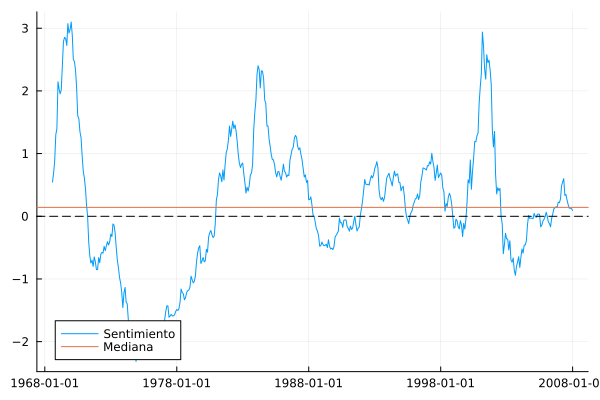

In [31]:
plot(df.DATE, df.Sentiment, label="Sentimiento")
hline!([median(df.Sentiment)], label="Mediana")
hline!([0], linestyle=:dash, color=:black, label=false)

In [32]:
df.dH = ifelse.(df.Sentiment_1 .> median(df.Sentiment_1), 1, 0)
df.dL = ifelse.(df.Sentiment_1 .<= median(df.Sentiment_1), 1, 0);

In [33]:
df_H = filter(:dH => ==(1), df)
df_L = filter(:dL => ==(1), df);

## Table 2

In [34]:
function table2(anomaly)
    dataf = DataFrame(L_H =[mean(df_H[:, "long_$anomaly"])*100, tstat(df_H[:, "long_$anomaly"])],
                      L_L =[mean(df_L[:, "long_$anomaly"])*100, tstat(df_L[:, "long_$anomaly"])],
                      L_HL =[mean(df_H[:, "long_$anomaly"] - df_L[:, "long_$anomaly"])*100, tstat(df_H[:, "long_$anomaly"] - df_L[:, "long_$anomaly"])],
                      S_H =[mean(df_H[:, "short_$anomaly"])*100, tstat(df_H[:, "short_$anomaly"])],
                      S_L =[mean(df_L[:, "short_$anomaly"])*100, tstat(df_L[:, "short_$anomaly"])],
                      S_HL =[mean(df_H[:, "short_$anomaly"] - df_L[:, "short_$anomaly"])*100, tstat(df_H[:, "short_$anomaly"] - df_L[:, "short_$anomaly"])],
                      LS_H=[mean(df_H[:, "diff_$anomaly"])*100, tstat(df_H[:, "diff_$anomaly"])],
                      LS_L=[mean(df_L[:, "diff_$anomaly"])*100, tstat(df_L[:, "diff_$anomaly"])],
                      LS_HL=[mean(df_H[:, "diff_$anomaly"] - df_L[:, "diff_$anomaly"])*100, tstat(df_H[:, "diff_$anomaly"] - df_L[:, "diff_$anomaly"])])
    return dataf
end

table2 (generic function with 1 method)

In [35]:
table2("ACC")

Row,L_H,L_L,L_HL,S_H,S_L,S_HL,LS_H,LS_L,LS_HL
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.347109,1.1395,-0.792387,-0.190208,0.715526,-0.905734,0.537316,0.42397,0.113346
2,0.835635,2.96355,-1.43205,-0.416899,1.66072,-1.45023,4.12772,3.85738,0.65203


In [36]:
table2("GP")

Row,L_H,L_L,L_HL,S_H,S_L,S_HL,LS_H,LS_L,LS_HL
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.371378,0.851465,-0.480087,-0.339704,0.941833,-1.28154,0.711082,-0.0903674,0.80145
2,0.879432,2.13221,-0.840531,-0.730835,2.36694,-2.12192,4.79931,-0.695095,4.36863


In [37]:
table2("AG")

Row,L_H,L_L,L_HL,S_H,S_L,S_HL,LS_H,LS_L,LS_HL
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.516564,1.08599,-0.569424,-0.51545,0.729939,-1.24539,1.03201,0.356049,0.675965
2,1.30911,2.7722,-1.06227,-1.05041,1.67057,-1.91074,5.94773,2.81355,3.06314


###

### Total Accruals

#### Long Leg

In [38]:
model_3_long_ACC_high = lm(@formula(long_ACC ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_ACC ~ 0 + dH + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
              Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────
dH     -0.000604076  0.00142541  -0.42    0.6721  -0.00341241  0.00220426
MktRF   1.1017       0.0329774   33.41    <1e-90   1.03672     1.16667
SMB     0.771806     0.0438707   17.59    <1e-43   0.685372    0.858239
HML     0.120086     0.0525285    2.29    0.0231   0.0165946   0.223578
─────────────────────────────────────────────────────────────────────────

In [39]:
model_3_long_ACC_low = lm(@formula(long_ACC ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_ACC ~ 0 + dL + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────
            Coef.   Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────
dL     0.00297404  0.000749735   3.97    <1e-04  0.00149691  0.00445116
MktRF  1.04306     0.0194261    53.69    <1e-99  1.00478     1.08133
SMB    0.829864    0.026714     31.06    <1e-84  0.777232    0.882496
HML    0.231738    0.0313007     7.40    <1e-11  0.17007     0.293407
───────────────────────────────────────────────────────────────────────

#### Short Leg

In [40]:
model_3_short_ACC_high = lm(@formula(short_ACC ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_ACC ~ 0 + dH + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────
dH     -0.00490135  0.00153657  -3.19    0.0016  -0.00792869  -0.00187401
MktRF   1.14131     0.0355491   32.11    <1e-86   1.07127      1.21135
SMB     0.855488    0.0472919   18.09    <1e-45   0.762313     0.948662
HML    -0.0221133   0.0566249   -0.39    0.6965  -0.133676     0.089449
─────────────────────────────────────────────────────────────────────────

In [41]:
model_3_short_ACC_low = lm(@formula(short_ACC ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_ACC ~ 0 + dL + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Coef.   Std. Error      t  Pr(>|t|)   Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────
dL     -0.00203046  0.000879324  -2.31    0.0218  -0.0037629  -0.000298014
MktRF   1.09707     0.0227838    48.15    <1e-99   1.05218     1.14196
SMB     1.03736     0.0313314    33.11    <1e-89   0.975628    1.09909
HML     0.174933    0.036711      4.77    <1e-05   0.102606    0.247261
──────────────────────────────────────────────────────────────────────────

#### Long-short

In [42]:
model_3_diff_ACC_high = lm(@formula(diff_ACC ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_ACC ~ 0 + dH + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────
dH      0.00429727  0.00129145   3.33    0.0010   0.00175286   0.00684169
MktRF  -0.0396132   0.0298783   -1.33    0.1862  -0.0984793    0.0192529
SMB    -0.0836823   0.0397478   -2.11    0.0363  -0.161993    -0.00537129
HML     0.142199    0.047592     2.99    0.0031   0.0484337    0.235965
─────────────────────────────────────────────────────────────────────────

In [43]:
model_3_diff_ACC_low = lm(@formula(diff_ACC ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_ACC ~ 0 + dL + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
            Coef.   Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────
dL      0.0050045  0.000998515   5.01    <1e-05   0.00303722   0.00697177
MktRF  -0.0540171  0.0258722    -2.09    0.0379  -0.10499     -0.00304384
SMB    -0.207493   0.0355784    -5.83    <1e-07  -0.277589    -0.137397
HML     0.0568047  0.0416871     1.36    0.1743  -0.0253271    0.138937
─────────────────────────────────────────────────────────────────────────

### Gross Profitability

#### Long Leg

In [44]:
model_3_long_GP_high = lm(@formula(long_GP ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_GP ~ 0 + dH + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────
dH      0.00135982  0.00135053   1.01    0.3150  -0.00130099  0.00402063
MktRF   1.08233     0.0312451   34.64    <1e-93   1.02077     1.14389
SMB     0.695754    0.0415661   16.74    <1e-41   0.613861    0.777648
HML    -0.0833816   0.0497691   -1.68    0.0952  -0.181437    0.0146735
────────────────────────────────────────────────────────────────────────

In [45]:
model_3_long_GP_low = lm(@formula(long_GP ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_GP ~ 0 + dL + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
             Coef.   Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────
dL     0.000112052  0.000823998   0.14    0.8920  -0.00151139  0.00173549
MktRF  1.04178      0.0213503    48.79    <1e-99   0.999716    1.08384
SMB    0.892836     0.0293601    30.41    <1e-82   0.834991    0.950681
HML    0.0597128    0.0344011     1.74    0.0839  -0.00806426  0.12749
─────────────────────────────────────────────────────────────────────────

#### Short Leg

In [46]:
model_3_short_GP_high = lm(@formula(short_GP ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_GP ~ 0 + dH + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────
dH     -0.00546766  0.00169784  -3.22    0.0015  -0.00881275  -0.00212258
MktRF   1.09742     0.0392803   27.94    <1e-75   1.02003      1.17481
SMB     0.877764    0.0522556   16.80    <1e-41   0.77481      0.980718
HML    -0.118271    0.0625682   -1.89    0.0600  -0.241543     0.00500072
─────────────────────────────────────────────────────────────────────────

In [47]:
model_3_short_GP_low = lm(@formula(short_GP ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_GP ~ 0 + dL + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Coef.   Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────
dL     0.000782248  0.000888041   0.88    0.3793  -0.000967369  0.00253186
MktRF  1.06731      0.0230097    46.39    <1e-99   1.02198      1.11264
SMB    0.861956     0.031642     27.24    <1e-73   0.799615     0.924297
HML    0.225144     0.0370749     6.07    <1e-08   0.152099     0.298189
──────────────────────────────────────────────────────────────────────────

#### Long-short

In [48]:
model_3_diff_GP_high = lm(@formula(diff_GP ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_GP ~ 0 + dH + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────
dH      0.00682748   0.0015048   4.54    <1e-05   0.00386272   0.00979224
MktRF  -0.0150931    0.0348143  -0.43    0.6650  -0.0836842    0.0534979
SMB    -0.182009     0.0463143  -3.93    0.0001  -0.273258    -0.0907611
HML     0.0348895    0.0554544   0.63    0.5299  -0.0743667    0.144146
─────────────────────────────────────────────────────────────────────────

In [49]:
model_3_diff_GP_low = lm(@formula(diff_GP ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_GP ~ 0 + dL + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────
              Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────
dL     -0.000670196  0.00129932  -0.52    0.6065  -0.00323011   0.00188972
MktRF  -0.0255288    0.0336661   -0.76    0.4490  -0.0918578    0.0408001
SMB     0.03088      0.0462963    0.67    0.5054  -0.0603329    0.122093
HML    -0.165432     0.0542454   -3.05    0.0026  -0.272306    -0.0585575
──────────────────────────────────────────────────────────────────────────

### Asset Growth

#### Long Leg

In [50]:
model_3_long_AG_high = lm(@formula(long_AG ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_AG ~ 0 + dH + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────
dH     0.000552844  0.00125899   0.44    0.6610  -0.00192762  0.00303331
MktRF  1.03221      0.0291273   35.44    <1e-95   0.974822    1.08959
SMB    0.862003     0.0387488   22.25    <1e-58   0.785661    0.938346
HML    0.212387     0.0463959    4.58    <1e-05   0.120978    0.303796
────────────────────────────────────────────────────────────────────────

In [51]:
model_3_long_AG_low = lm(@formula(long_AG ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_AG ~ 0 + dL + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────
            Coef.   Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────
dL     0.00217193  0.000784331   2.77    0.0061  0.000626641  0.00371722
MktRF  1.0187      0.0203225    50.13    <1e-99  0.97866      1.05874
SMB    0.940418    0.0279467    33.65    <1e-90  0.885358     0.995479
HML    0.389738    0.0327451    11.90    <1e-25  0.325224     0.454253
────────────────────────────────────────────────────────────────────────

#### Short leg

In [52]:
model_3_short_AG_high = lm(@formula(short_AG ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_AG ~ 0 + dH + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────
dH     -0.00717365  0.00170763  -4.20    <1e-04  -0.010538  -0.00380927
MktRF   1.22796     0.0395068   31.08    <1e-84   1.15013    1.3058
SMB     0.761189    0.0525569   14.48    <1e-33   0.657641   0.864736
HML    -0.174229    0.062929    -2.77    0.0061  -0.298211  -0.050246
───────────────────────────────────────────────────────────────────────

In [53]:
model_3_short_AG_low = lm(@formula(short_AG ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_AG ~ 0 + dL + MktRF + SMB + HML

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────
dL     -0.00187532  0.000821357  -2.28    0.0233  -0.00349356  -0.000257089
MktRF   1.13837     0.0212819    53.49    <1e-99   1.09644      1.1803
SMB     0.983552    0.029266     33.61    <1e-90   0.925892     1.04121
HML     0.0376027   0.0342909     1.10    0.2740  -0.0299571    0.105163
───────────────────────────────────────────────────────────────────────────

#### Long-short

In [54]:
model_3_diff_AG_high = lm(@formula(diff_AG ~ 0 + dH + MktRF + SMB + HML), df_H)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_AG ~ 0 + dH + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────
dH      0.00772649  0.00140019   5.52    <1e-07   0.00496784   0.0104851
MktRF  -0.195757    0.032394    -6.04    <1e-08  -0.259579    -0.131934
SMB     0.100814    0.0430946    2.34    0.0202   0.0159096    0.185719
HML     0.386615    0.0515993    7.49    <1e-11   0.284954     0.488276
────────────────────────────────────────────────────────────────────────

In [55]:
model_3_diff_AG_low = lm(@formula(diff_AG ~ 0 + dL + MktRF + SMB + HML), df_L)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_AG ~ 0 + dL + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────
dL      0.00404725  0.00101733   3.98    <1e-04   0.00204291   0.0060516
MktRF  -0.11967     0.0263597   -4.54    <1e-05  -0.171604    -0.067736
SMB    -0.0431338   0.0362488   -1.19    0.2353  -0.114551     0.0282834
HML     0.352136    0.0424726    8.29    <1e-14   0.268456     0.435815
────────────────────────────────────────────────────────────────────────

##

In [56]:
function tstat_d(y, model_high, model_low)
    """Asumiendo covarianza entre ambos interceptos igual a 0, std(α0 - β0) = sqrt(var(α0) + var(β0))"""
    return (coef(model_high)[1] - coef(model_low)[1]), (coef(model_high)[1] - coef(model_low)[1])/sqrt(vcov(HC1(), model_high)[1] + vcov(HC1(), model_low)[1])
end

tstat_d (generic function with 1 method)

In [57]:
function tstat_m(model, coef_pos)
    """t-statistic with heteroskedasticity-consistent (robust) standard errors (White, 1980)"""
    return coef(model)[coef_pos]/sqrt(vcov(HC1(), model)[coef_pos, coef_pos])
end

tstat_m (generic function with 1 method)

## Table 3

Total Accruals

In [58]:
DataFrame(L_H = [coef(model_3_long_ACC_high)[1]*100, tstat_m(model_3_long_ACC_high, 1)],
          L_L = [coef(model_3_long_ACC_low)[1]*100, tstat_m(model_3_long_ACC_low, 1)],
          L_HL= [tstat_d("long_ACC", model_3_long_ACC_high, model_3_long_ACC_low)[1]*100, tstat_d("long_ACC", model_3_long_ACC_high, model_3_long_ACC_low)[2]],
          S_H = [coef(model_3_short_ACC_high)[1]*100, tstat_m(model_3_short_ACC_high, 1)],
          S_L = [coef(model_3_short_ACC_low)[1]*100, tstat_m(model_3_short_ACC_low, 1)],
          S_HL= [tstat_d("short_ACC", model_3_short_ACC_high, model_3_short_ACC_low)[1]*100, tstat_d("short_ACC", model_3_short_ACC_high, model_3_short_ACC_low)[2]],
          LS_H= [coef(model_3_diff_ACC_high)[1]*100, tstat_m(model_3_diff_ACC_high, 1)],
          LS_L= [coef(model_3_diff_ACC_low)[1]*100, tstat_m(model_3_diff_ACC_low, 1)],
          LS_HL=[tstat_d("diff_ACC", model_3_diff_ACC_high, model_3_diff_ACC_low)[1]*100, tstat_d("diff_ACC", model_3_diff_ACC_high, model_3_diff_ACC_low)[2]])

Row,L_H,L_L,L_HL,S_H,S_L,S_HL,LS_H,LS_L,LS_HL
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.0604076,0.297404,-0.357812,-0.490135,-0.203046,-0.287089,0.429727,0.50045,-0.0707223
2,-0.378922,4.16557,-2.04842,-2.95791,-2.33283,-1.53383,3.28893,5.1682,-0.434869


Gross Profitability

In [59]:
DataFrame(L_H = [coef(model_3_long_GP_high)[1]*100, tstat_m(model_3_long_GP_high, 1)],
          L_L = [coef(model_3_long_GP_low)[1]*100, tstat_m(model_3_long_GP_low, 1)],
          L_HL= [tstat_d("long_GP", model_3_long_GP_high, model_3_long_GP_low)[1]*100, tstat_d("long_GP", model_3_long_GP_high, model_3_long_GP_low)[2]],
          S_H = [coef(model_3_short_GP_high)[1]*100, tstat_m(model_3_short_GP_high, 1)],
          S_L = [coef(model_3_short_GP_low)[1]*100, tstat_m(model_3_short_GP_low, 1)],
          S_HL= [tstat_d("short_GP", model_3_short_GP_high, model_3_short_GP_low)[1]*100, tstat_d("short_GP", model_3_short_GP_high, model_3_short_GP_low)[2]],
          LS_H= [coef(model_3_diff_GP_high)[1]*100, tstat_m(model_3_diff_GP_high, 1)],
          LS_L= [coef(model_3_diff_GP_low)[1]*100, tstat_m(model_3_diff_GP_low, 1)],
          LS_HL=[tstat_d("diff_GP", model_3_diff_GP_high, model_3_diff_GP_low)[1]*100, tstat_d("diff_GP", model_3_diff_GP_high, model_3_diff_GP_low)[2]])

Row,L_H,L_L,L_HL,S_H,S_L,S_HL,LS_H,LS_L,LS_HL
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.135982,0.0112052,0.124777,-0.546766,0.0782248,-0.624991,0.682748,-0.0670196,0.749768
2,0.913295,0.140447,0.738674,-3.02838,0.918475,-3.13079,4.95394,-0.542734,4.05175


Asset Growth

In [60]:
DataFrame(L_H = [coef(model_3_long_AG_high)[1]*100, tstat_m(model_3_long_AG_high, 1)],
          L_L = [coef(model_3_long_AG_low)[1]*100, tstat_m(model_3_long_AG_low, 1)],
          L_HL= [tstat_d("long_AG", model_3_long_AG_high, model_3_long_AG_low)[1]*100, tstat_d("long_AG", model_3_long_AG_high, model_3_long_AG_low)[2]],
          S_H = [coef(model_3_short_AG_high)[1]*100, tstat_m(model_3_short_AG_high, 1)],
          S_L = [coef(model_3_short_AG_low)[1]*100, tstat_m(model_3_short_AG_low, 1)],
          S_HL= [tstat_d("short_AG", model_3_short_AG_high, model_3_short_AG_low)[1]*100, tstat_d("short_AG", model_3_short_AG_high, model_3_short_AG_low)[2]],
          LS_H= [coef(model_3_diff_AG_high)[1]*100, tstat_m(model_3_diff_AG_high, 1)],
          LS_L= [coef(model_3_diff_AG_low)[1]*100, tstat_m(model_3_diff_AG_low, 1)],
          LS_HL=[tstat_d("diff_AG", model_3_diff_AG_high, model_3_diff_AG_low)[1]*100, tstat_d("diff_AG", model_3_diff_AG_high, model_3_diff_AG_low)[2]])

Row,L_H,L_L,L_HL,S_H,S_L,S_HL,LS_H,LS_L,LS_HL
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0552844,0.217193,-0.161908,-0.717365,-0.187532,-0.529832,0.772649,0.404725,0.367924
2,0.403481,2.83543,-1.03142,-3.71034,-2.33175,-2.53021,5.10167,4.02929,2.02454


# 2.4 (Table 4 y 5)

### Long leg

In [61]:
model_4_long_ACC = lm(@formula(long_ACC ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_ACC ~ 1 + Sentiment_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00848218  0.00284655   2.98    0.0030   0.0028887   0.0140757
Sentiment_1  -0.00663095  0.00260007  -2.55    0.0111  -0.0117401  -0.00152181
──────────────────────────────────────────────────────────────────────────────

In [62]:
model_4_long_GP = lm(@formula(long_GP ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_GP ~ 1 + Sentiment_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00683137  0.00293009   2.33    0.0201   0.00107374  0.012589
Sentiment_1  -0.00453262  0.00267637  -1.69    0.0910  -0.00979169  0.00072646
──────────────────────────────────────────────────────────────────────────────

In [63]:
model_4_long_AG = lm(@formula(long_AG ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_AG ~ 1 + Sentiment_1

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00897857  0.00279587   3.21    0.0014   0.00348468   0.0144725
Sentiment_1  -0.00610422  0.00255377  -2.39    0.0172  -0.0111224   -0.00108605
───────────────────────────────────────────────────────────────────────────────

### Short leg

In [64]:
model_4_short_ACC = lm(@formula(short_ACC ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_ACC ~ 1 + Sentiment_1

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00370749  0.00315922   1.17    0.2412  -0.00250038   0.00991536
Sentiment_1  -0.00683156  0.00288566  -2.37    0.0183  -0.0125019   -0.00116123
───────────────────────────────────────────────────────────────────────────────

In [65]:
model_4_short_GP = lm(@formula(short_GP ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_GP ~ 1 + Sentiment_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00438536  0.00307514   1.43    0.1545  -0.0016573   0.010428
Sentiment_1  -0.00868859  0.00280886  -3.09    0.0021  -0.014208   -0.00316917
──────────────────────────────────────────────────────────────────────────────

In [66]:
model_4_short_AG = lm(@formula(short_AG ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_AG ~ 1 + Sentiment_1

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00234868  0.00330783   0.71    0.4780  -0.00415122   0.00884858
Sentiment_1  -0.00806615  0.00302141  -2.67    0.0079  -0.0140032   -0.00212908
───────────────────────────────────────────────────────────────────────────────

### Long-short

In [67]:
model_4_diff_ACC = lm(@formula(diff_ACC ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_ACC ~ 1 + Sentiment_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00477469   0.000861224  5.54    <1e-07   0.00308239  0.006467
Sentiment_1  0.000200611  0.00078665   0.26    0.7988  -0.00134516  0.00174638
──────────────────────────────────────────────────────────────────────────────

In [68]:
model_4_diff_GP = lm(@formula(diff_GP ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_GP ~ 1 + Sentiment_1

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00244601  0.000991446  2.47    0.0140  0.000497819  0.00439421
Sentiment_1  0.00415597  0.000905596  4.59    <1e-05  0.00237648   0.00593547
─────────────────────────────────────────────────────────────────────────────

In [69]:
model_4_diff_AG = lm(@formula(diff_AG ~ Sentiment_1), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_AG ~ 1 + Sentiment_1

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00662989  0.00109205  6.07    <1e-08  0.00448401  0.00877578
Sentiment_1  0.00196194  0.00099749  1.97    0.0498  1.86531e-6  0.00392201
───────────────────────────────────────────────────────────────────────────

## Tabla 4

In [70]:
DataFrame(L_b =[coef(model_4_long_ACC)[2]*100,  coef(model_4_long_GP)[2]*100,  coef(model_4_long_AG)[2]*100],
          L_t =[tstat_m(model_4_long_ACC, 2),   tstat_m(model_4_long_GP, 2),   tstat_m(model_4_long_AG, 2)],
          S_b =[coef(model_4_short_ACC)[2]*100, coef(model_4_short_GP)[2]*100, coef(model_4_short_AG)[2]*100],
          S_t =[tstat_m(model_4_short_ACC, 2),  tstat_m(model_4_short_GP, 2),  tstat_m(model_4_short_AG, 2)],
          LS_b=[coef(model_4_diff_ACC)[2]*100,  coef(model_4_diff_GP)[2]*100,  coef(model_4_diff_AG)[2]*100],
          LS_t=[tstat_m(model_4_diff_ACC, 2),   tstat_m(model_4_diff_GP, 2),   tstat_m(model_4_diff_AG, 2)])

Row,L_b,L_t,S_b,S_t,LS_b,LS_t
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.663095,-2.11783,-0.683156,-1.99216,0.0200611,0.229705
2,-0.453262,-1.39631,-0.868859,-2.58119,0.415597,4.21415
3,-0.610422,-2.02021,-0.806615,-2.19873,0.196194,1.62192


###

### Long leg

In [71]:
model_5_long_ACC = lm(@formula(long_ACC ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_ACC ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00130661  0.000800964   1.63    0.1035  -0.000267317   0.00288053
Sentiment_1  -0.00186038  0.000715401  -2.60    0.0096  -0.00326616   -0.000454588
MktRF         1.07548     0.0191377    56.20    <1e-99   1.03788       1.11309
SMB           0.801612    0.0252677    31.72    <1e-99   0.751961      0.851264
HML           0.164458    0.0295444     5.57    <1e-07   0.106402      0.222514
──────────────────────────────────────────────────────────────────────────────────

In [72]:
model_5_long_GP = lm(@formula(long_GP ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_GP ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000316857  0.000797713   0.40    0.6914  -0.00125068   0.00188439
Sentiment_1  0.000541399  0.000712497   0.76    0.4477  -0.000858682  0.00194148
MktRF        1.07824      0.01906      56.57    <1e-99   1.04079      1.1157
SMB          0.797289     0.0251651    31.68    <1e-99   0.747838     0.846739
HML          0.00860871   0.0294245     0.29    0.7700  -0.0492115    0.0664289
────────────────────────────────────────────────────────────────────────────────

In [73]:
model_5_long_AG = lm(@formula(long_AG ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_AG ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00129279  0.000742291   1.74    0.0822  -0.00016584   0.00275142
Sentiment_1  -0.00140563  0.000662996  -2.12    0.0345  -0.00270843  -0.000102816
MktRF         1.03028     0.0177358    58.09    <1e-99   0.995426     1.06513
SMB           0.91151     0.0234168    38.93    <1e-99   0.865495     0.957525
HML           0.295754    0.0273802    10.80    <1e-23   0.241951     0.349557
─────────────────────────────────────────────────────────────────────────────────

### Short leg

In [74]:
model_5_short_ACC = lm(@formula(short_ACC ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_ACC ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00362003  0.000893447  -4.05    <1e-04  -0.00537568  -0.00186437
Sentiment_1  -0.00132821  0.000798004  -1.66    0.0967  -0.00289631   0.000239898
MktRF         1.132       0.0213474    53.03    <1e-99   1.09005      1.17395
SMB           0.951656    0.0281852    33.76    <1e-99   0.896271     1.00704
HML           0.0820673   0.0329558     2.49    0.0131   0.0173081    0.146827
─────────────────────────────────────────────────────────────────────────────────

In [75]:
model_5_short_GP = lm(@formula(short_GP ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_GP ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00226732  0.000975812  -2.32    0.0206  -0.00418482  -0.00034981
Sentiment_1  -0.00332915  0.000871571  -3.82    0.0002  -0.00504182  -0.00161648
MktRF         1.0778      0.0233154    46.23    <1e-99   1.03198      1.12362
SMB           0.897554    0.0307836    29.16    <1e-99   0.837064     0.958045
HML           0.0055849   0.0359939     0.16    0.8768  -0.0651444    0.0763142
────────────────────────────────────────────────────────────────────────────────

In [76]:
model_5_short_AG = lm(@formula(short_AG ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_AG ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00454878  0.000961827  -4.73    <1e-05  -0.00643881  -0.00265876
Sentiment_1  -0.00231785  0.000859079  -2.70    0.0072  -0.00400598  -0.000629734
MktRF         1.19842     0.0229813    52.15    <1e-99   1.15326      1.24358
SMB           0.87199     0.0303424    28.74    <1e-99   0.812366     0.931614
HML          -0.0654535   0.0354781    -1.84    0.0657  -0.135169     0.00426209
─────────────────────────────────────────────────────────────────────────────────

### Long-short

In [77]:
model_5_diff_ACC = lm(@formula(diff_ACC ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_ACC ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00492663   0.000816094   6.04    <1e-08   0.00332298   0.00653028
Sentiment_1  -0.000532167  0.000728914  -0.73    0.4657  -0.00196451   0.000900174
MktRF        -0.0565209    0.0194992    -2.90    0.0039  -0.0948375   -0.0182042
SMB          -0.150043     0.025745     -5.83    <1e-07  -0.200633    -0.0994537
HML           0.0823909    0.0301025     2.74    0.0064   0.0232384    0.141543
──────────────────────────────────────────────────────────────────────────────────

In [78]:
model_5_diff_GP = lm(@formula(diff_GP ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_GP ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00258417   0.00101117    2.56    0.0109   0.000597184   0.00457116
Sentiment_1   0.00387055   0.000903153   4.29    <1e-04   0.00209582    0.00564528
MktRF         0.000442007  0.0241603     0.02    0.9854  -0.0470338     0.0479178
SMB          -0.100266     0.031899     -3.14    0.0018  -0.162949     -0.0375832
HML           0.0030238    0.0372982     0.08    0.9354  -0.0702684     0.076316
──────────────────────────────────────────────────────────────────────────────────

In [79]:
model_5_diff_AG = lm(@formula(diff_AG ~ Sentiment_1 + MktRF + SMB + HML), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_AG ~ 1 + Sentiment_1 + MktRF + SMB + HML

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00584157   0.000869936   6.71    <1e-10   0.00413211    0.00755102
Sentiment_1   0.000912229  0.000777005   1.17    0.2410  -0.000614612   0.00243907
MktRF        -0.168145     0.0207857    -8.09    <1e-14  -0.20899      -0.127301
SMB           0.0395199    0.0274435     1.44    0.1505  -0.0144076     0.0934474
HML           0.361207     0.0320886    11.26    <1e-25   0.298152      0.424263
──────────────────────────────────────────────────────────────────────────────────

## Tabla 5

In [80]:
DataFrame(L_b =[coef(model_5_long_ACC)[2]*100,  coef(model_5_long_GP)[2]*100,  coef(model_5_long_AG)[2]*100],
          L_t =[tstat_m(model_5_long_ACC, 2),   tstat_m(model_5_long_GP, 2),   tstat_m(model_5_long_AG, 2)],
          S_b =[coef(model_5_short_ACC)[2]*100, coef(model_5_short_GP)[2]*100, coef(model_5_short_AG)[2]*100],
          S_t =[tstat_m(model_5_short_ACC, 2),  tstat_m(model_5_short_GP, 2),  tstat_m(model_5_short_AG, 2)],
          LS_b=[coef(model_5_diff_ACC)[2]*100,  coef(model_5_diff_GP)[2]*100,  coef(model_5_diff_AG)[2]*100],
          LS_t=[tstat_m(model_5_diff_ACC, 2),   tstat_m(model_5_diff_GP, 2),   tstat_m(model_5_diff_AG, 2)])

Row,L_b,L_t,S_b,S_t,LS_b,LS_t
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.186038,-1.91891,-0.132821,-1.51211,-0.0532167,-0.654609
2,0.0541399,0.595377,-0.332915,-2.73529,0.387055,3.93003
3,-0.140563,-1.64357,-0.231785,-2.11342,0.0912229,1.05104


## Tabla 6

Default premium = Baa - Aaa </br>
Term premium = 20-year - 1-year </br>
Real interest rate </br>
Inflation rate </br>
Consumption-wealth ratio (cay)

#### Default premium
Baa: Moody's Seasoned Baa Corporate Bond Yield </br>
Aaa: Moody's Seasoned Aaa Corporate Bond Yield

In [81]:
Aaa = CSV.read("AAA.csv", DataFrame);
Baa = CSV.read("BAA.csv", DataFrame);

In [82]:
default_premium = DataFrame(DATE = Aaa.DATE,
                            default_premium = Baa.BAA - Aaa.AAA)

Row,DATE,default_premium
,Date,Float64
1,1919-01-01,1.77
2,1919-02-01,1.85
3,1919-03-01,1.76
4,1919-04-01,1.79
5,1919-05-01,1.7
6,1919-06-01,1.64
7,1919-07-01,1.62
8,1919-08-01,1.57
9,1919-09-01,1.67


#### Term premium
GS20: Market Yield on U.S. Treasury Securities at 20-Year Constant Maturity, Quoted on an Investment Basis </br>
GS1: Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis

In [83]:
GS20 = CSV.read("GS20.csv", DataFrame)
GS1 = CSV.read("GS1.csv", DataFrame);

In [84]:
term_premium = DataFrame(DATE = GS20.DATE,
                         GS20 = GS20.GS20,
                         GS1 = GS1.GS1)

term_premium = term_premium[(term_premium.GS20 .!= ".") .& (term_premium.GS1 .!= "."), :]
term_premium.GS20 = parse.(Float64, term_premium.GS20)
term_premium

Row,DATE,GS20,GS1
,Date,Float64,Float64
1,1953-04-01,3.08,2.36
2,1953-05-01,3.18,2.48
3,1953-06-01,3.21,2.45
4,1953-07-01,3.12,2.38
5,1953-08-01,3.1,2.28
6,1953-09-01,3.07,2.2
7,1953-10-01,2.95,1.79
8,1953-11-01,2.95,1.67
9,1953-12-01,2.89,1.66


In [85]:
term_premium.term_premium = term_premium.GS20 - term_premium.GS1
term_premium

Row,DATE,GS20,GS1,term_premium
,Date,Float64,Float64,Float64
1,1953-04-01,3.08,2.36,0.72
2,1953-05-01,3.18,2.48,0.7
3,1953-06-01,3.21,2.45,0.76
4,1953-07-01,3.12,2.38,0.74
5,1953-08-01,3.1,2.28,0.82
6,1953-09-01,3.07,2.2,0.87
7,1953-10-01,2.95,1.79,1.16
8,1953-11-01,2.95,1.67,1.28
9,1953-12-01,2.89,1.66,1.23


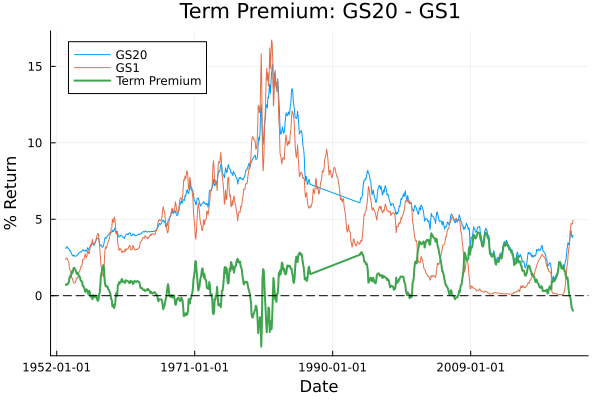

In [86]:
plot(term_premium.DATE, term_premium.GS20, label="GS20")
plot!(GS1.DATE, GS1.GS1, label="GS1")
plot!(term_premium.DATE, term_premium.term_premium, label="Term Premium", linewidth=2)
hline!([0], linestyle=:dash, color=:black, label=false)
xlabel!("Date")
ylabel!("% Return")
title!("Term Premium: GS20 - GS1")

In [87]:
cor(term_premium.GS20, term_premium.GS1)

0.9263729930235655

In [88]:
model = lm(@formula(GS20 ~ GS1), term_premium)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

GS20 ~ 1 + GS1

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  2.12348    0.0641987  33.08    <1e-99   1.99745    2.24951
GS1          0.777585   0.0114971  67.63    <1e-99   0.755015   0.800156
────────────────────────────────────────────────────────────────────────

In [89]:
term_premium_fitted = DataFrame(DATE = GS20.DATE,
                                GS20 = GS20.GS20,
                                GS1 = GS1.GS1)

Row,DATE,GS20,GS1
,Date,String7,Float64
1,1953-04-01,3.08,2.36
2,1953-05-01,3.18,2.48
3,1953-06-01,3.21,2.45
4,1953-07-01,3.12,2.38
5,1953-08-01,3.1,2.28
6,1953-09-01,3.07,2.2
7,1953-10-01,2.95,1.79
8,1953-11-01,2.95,1.67
9,1953-12-01,2.89,1.66


In [90]:
# term_premium_fitted[(term_premium_fitted.GS20 .== "."), :]
# term_premium_fitted[405:407+80, :]

In [91]:
term_premium_fitted.GS20[406:406+80] .= "-99"
term_premium_fitted.GS20 = parse.(Float64, String.(term_premium_fitted.GS20));

In [92]:
X = term_premium_fitted.GS1[406:406+80]
unos = ones(length(X));

In [93]:
term_premium_fitted.GS20[406:406+80] = [unos X] * coef(model);

In [94]:
term_premium_fitted.term_premium = term_premium_fitted.GS20 - term_premium_fitted.GS1;

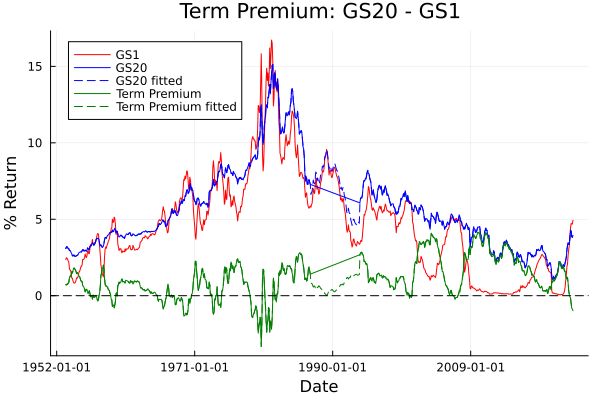

In [95]:
plot(GS1.DATE, GS1.GS1, label="GS1", color=:red)
plot!(term_premium.DATE, term_premium.GS20, label="GS20", color=:blue)
plot!(term_premium_fitted.DATE, term_premium_fitted.GS20, label="GS20 fitted", linestyle=:dash, color=:blue)
plot!(term_premium.DATE, term_premium.term_premium, label="Term Premium", color=:green)
plot!(term_premium_fitted.DATE, term_premium_fitted.term_premium, label="Term Premium fitted", color=:green, linestyle=:dash)
# plot!(term_premium_2[(term_premium_2.GS20 .== "."), :].DATE, [unos X] * coef(model) - term_premium_2[(term_premium_2.GS20 .== "."), :].GS1, label="Term Premium", linewidth=2)
hline!([0], linestyle=:dash, color=:black, label=false)
xlabel!("Date")
ylabel!("% Return")
title!("Term Premium: GS20 - GS1")

In [96]:
term_premium_fitted = DataFrame(DATE=term_premium_fitted.DATE, term_premium=term_premium_fitted.term_premium)

Row,DATE,term_premium
,Date,Float64
1,1953-04-01,0.72
2,1953-05-01,0.7
3,1953-06-01,0.76
4,1953-07-01,0.74
5,1953-08-01,0.82
6,1953-09-01,0.87
7,1953-10-01,1.16
8,1953-11-01,1.28
9,1953-12-01,1.23


#### Real interest rate
3-Month Treasury Bill: Secondary Market Rate [TB3MS]

In [97]:
TB3MS = CSV.read("TB3MS.csv", DataFrame)

Row,DATE,TB3MS
,Date,Float64
1,1934-01-01,0.72
2,1934-02-01,0.62
3,1934-03-01,0.24
4,1934-04-01,0.15
5,1934-05-01,0.16
6,1934-06-01,0.15
7,1934-07-01,0.15
8,1934-08-01,0.19
9,1934-09-01,0.21


In [98]:
real_interest_rate = DataFrame(DATE=TB3MS.DATE, real_interest_rate=TB3MS.TB3MS)

Row,DATE,real_interest_rate
,Date,Float64
1,1934-01-01,0.72
2,1934-02-01,0.62
3,1934-03-01,0.24
4,1934-04-01,0.15
5,1934-05-01,0.16
6,1934-06-01,0.15
7,1934-07-01,0.15
8,1934-08-01,0.19
9,1934-09-01,0.21


#### Inflation
CPIAUCSL: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

In [99]:
CPIAUCSL = CSV.read("CPIAUCSL.csv", DataFrame)

Row,DATE,CPIAUCSL
,Date,Float64
1,1947-01-01,21.48
2,1947-02-01,21.62
3,1947-03-01,22.0
4,1947-04-01,22.0
5,1947-05-01,21.95
6,1947-06-01,22.08
7,1947-07-01,22.23
8,1947-08-01,22.4
9,1947-09-01,22.84


In [100]:
INF = [(CPIAUCSL[:, :CPIAUCSL][i + 12] - CPIAUCSL[:, :CPIAUCSL][i])*100/CPIAUCSL[:, :CPIAUCSL][i] for i in 1:(length(CPIAUCSL.DATE)-12)]
inflation = DataFrame(DATE=CPIAUCSL.DATE[12+1:end], inflation=INF)

Row,DATE,inflation
,Date,Float64
1,1948-01-01,10.2421
2,1948-02-01,9.48196
3,1948-03-01,6.81818
4,1948-04-01,8.27273
5,1948-05-01,9.38497
6,1948-06-01,9.375
7,1948-07-01,9.76158
8,1948-08-01,9.0625
9,1948-09-01,6.65499


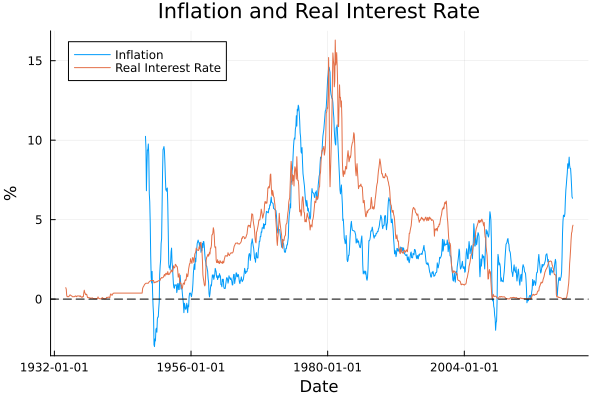

In [101]:
plot(inflation.DATE, inflation.inflation, label="Inflation")
plot!(real_interest_rate.DATE, real_interest_rate.real_interest_rate, label="Real Interest Rate")
hline!([0], linestyle=:dash, color=:black, label=false)
xlabel!("Date")
ylabel!("%")
title!("Inflation and Real Interest Rate")

#### cay

In [102]:
using Dates

In [103]:
BLL_Data = CSV.read("BLL_Data.csv", DataFrame)

Row,Date,cay_fc,cay_ms_smoothed,cay_ms_filterered,c,a,y
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1952.0,0.000786001,-0.0068873,-0.0068873,9.19533,10.8665,8.91875
2,1952.25,0.00995956,0.000225622,0.000225621,9.20885,10.8849,8.92139
3,1952.5,0.00877773,0.00173559,0.00173559,9.21798,10.8818,8.93508
4,1952.75,-0.00456851,-0.00593855,-0.00593855,9.22692,10.876,8.96452
5,1953.0,-0.00361145,-0.00339464,-0.00339465,9.23671,10.8778,8.97553
6,1953.25,-0.00881385,-0.00690992,-0.00690992,9.23921,10.8775,8.98544
7,1953.5,-0.00680557,-0.00592491,-0.00592491,9.23514,10.8758,8.97793
8,1953.75,-0.00432405,-0.0058348,-0.0058348,9.22873,10.8789,8.96606
9,1954.0,0.00754492,0.0030019,0.0030019,9.23378,10.8887,8.95577


In [104]:
BLL_Data.DATE = [Date(1952, 4) + Dates.Month(i)*3 for i in 0:(length(BLL_Data.Date)-1)];

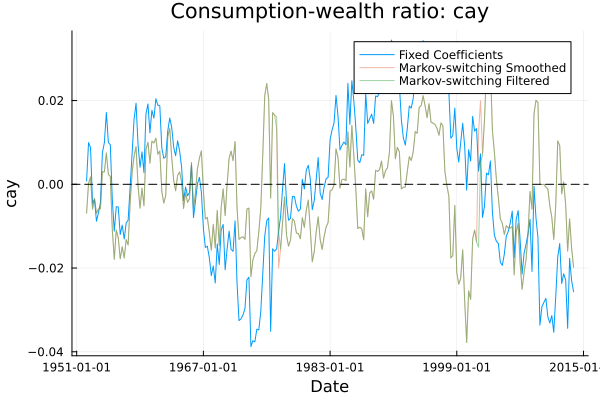

In [105]:
# FC: Fixed Coefficients
# MS: Markov Switching
plot(BLL_Data.DATE, BLL_Data.cay_fc, label="Fixed Coefficients")
plot!(BLL_Data.DATE, BLL_Data.cay_ms_smoothed, alpha=0.5, label="Markov-switching Smoothed")
plot!(BLL_Data.DATE, BLL_Data.cay_ms_filterered, alpha=0.5, label="Markov-switching Filtered")
hline!([0], linestyle=:dash, color=:black, label=false)
ylabel!("cay")
xlabel!("Date")
title!("Consumption-wealth ratio: cay")

In [106]:
cay = DataFrame(DATE=BLL_Data.DATE, cay_ms_smoothed=BLL_Data.cay_ms_smoothed)

Row,DATE,cay_ms_smoothed
,Date,Float64
1,1952-04-01,-0.0068873
2,1952-07-01,0.000225622
3,1952-10-01,0.00173559
4,1953-01-01,-0.00593855
5,1953-04-01,-0.00339464
6,1953-07-01,-0.00690992
7,1953-10-01,-0.00592491
8,1954-01-01,-0.0058348
9,1954-04-01,0.0030019


In [107]:
macro_variables = innerjoin(default_premium, term_premium_fitted, real_interest_rate, inflation, cay; on=:DATE)

Row,DATE,default_premium,term_premium,real_interest_rate,inflation,cay_ms_smoothed
,Date,Float64,Float64,Float64,Float64,Float64
1,1953-04-01,0.42,0.72,2.19,0.869237,-0.00339464
2,1953-07-01,0.58,0.74,2.04,0.412294,-0.00690992
3,1953-10-01,0.66,1.16,1.38,0.974148,-0.00592491
4,1954-01-01,0.65,1.39,1.18,1.12613,-0.0058348
5,1954-04-01,0.62,1.64,0.97,0.636943,0.0030019
6,1954-07-01,0.61,1.73,0.72,0.261292,0.00294167
7,1954-10-01,0.59,1.44,0.98,-0.853432,0.00748802
8,1955-01-01,0.52,1.36,1.22,-0.631032,0.00237228
9,1955-04-01,0.48,1.1,1.59,-0.260611,0.00186943


In [108]:
macro_variables.DATE = macro_variables.DATE - Dates.Day(1);

In [109]:
df_macro = innerjoin(df, macro_variables; on=:DATE)

Row,DATE,short_ACC,long_ACC,diff_ACC,short_AG,long_AG,diff_AG,long_GP,short_GP,diff_GP,Sentiment,MktRF,SMB,HML,RF,Sentiment_1,ones,dH,dL,default_premium,term_premium,real_interest_rate,inflation,cay_ms_smoothed
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,1968-09-30,0.0891674,0.120997,0.0318296,0.0691735,0.078126,0.00895242,0.0621499,0.0733897,-0.0112398,0.877197,0.0403,0.0276,0.0023,0.0043,0.689873,1.0,1,0,0.75,-0.13,5.35,4.74777,-0.00623055
2,1968-12-31,-0.00554068,0.0197178,0.0252585,-0.000996727,0.0378652,0.0388619,-0.013891,0.0192688,-0.0331598,2.14558,-0.0394,0.0344,0.0002,0.0043,1.39424,1.0,1,0,0.73,-0.35,6.14,4.69208,-0.014667
3,1969-03-31,0.00410858,0.0106231,0.00651454,0.0128178,0.0204457,0.00762786,0.0164684,0.0105848,0.00588353,2.01487,0.0264,-0.0025,-0.0046,0.0046,1.95348,1.0,1,0,0.65,-0.23,6.11,5.52326,-0.00545845
4,1969-06-30,-0.134987,-0.124837,0.0101493,-0.127948,-0.136098,-0.00815019,-0.0952346,-0.129274,0.0340392,2.85359,-0.0718,-0.0539,-0.0109,0.0051,2.78588,1.0,1,0,0.76,-1.33,7.0,5.44413,-0.0010833
5,1969-09-30,0.000684265,-0.0325438,-0.0332281,-0.0363079,-0.0249729,0.011335,-0.0212238,-0.0275485,0.00632466,3.07365,-0.0298,0.012,-0.0319,0.0062,2.72449,1.0,1,0,0.89,-1.15,7.0,5.66572,-0.0074735
6,1969-12-31,-0.0926424,-0.115639,-0.0229965,-0.0802161,-0.101959,-0.0217425,-0.0577925,-0.0989817,0.0411892,3.09929,-0.0263,-0.0367,-0.0302,0.0064,2.97712,1.0,1,0,0.95,-1.18,7.87,6.16246,3.65e-5
7,1970-03-31,-0.0381879,-0.021584,0.0166039,-0.046518,-0.0146154,0.0319026,-0.043479,-0.0277011,-0.0157779,2.46725,-0.0106,-0.0232,0.0425,0.0057,2.50249,1.0,1,0,0.87,-0.21,6.51,6.06061,0.00621576
8,1970-06-30,-0.0963513,-0.101786,-0.00543425,-0.109052,-0.0778855,0.0311663,-0.0753504,-0.0891528,0.0138024,1.60278,-0.0579,-0.0216,0.0087,0.0058,2.04263,1.0,1,0,0.96,-0.18,6.45,5.70652,0.00791662
9,1970-09-30,0.202918,0.0789882,-0.12393,0.176802,0.102445,-0.0743568,0.118414,0.127105,-0.00869121,1.25405,0.0418,0.0862,-0.0558,0.0054,1.34656,1.0,1,0,1.3,0.45,5.91,5.63003,0.00564827


In [110]:
df_macro.default_premium_1 = lag(df_macro.default_premium, 1)
df_macro.term_premium_1 = lag(df_macro.term_premium, 1)
df_macro.real_interest_rate_1 = lag(df_macro.real_interest_rate, 1)
df_macro.inflation_1 = lag(df_macro.inflation, 1)
df_macro.cay_ms_smoothed_1 = lag(df_macro.cay_ms_smoothed, 1);

#### Total accruals

In [111]:
model_6_long_ACC = lm(@formula(long_ACC ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_ACC ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.00169303   0.00485815   -0.35    0.7280  -0.0112939     0.00790782
Sentiment_1           -0.00449258   0.00140157   -3.21    0.0017  -0.0072624    -0.00172276
MktRF                  1.08832      0.0341731    31.85    <1e-67   1.02078       1.15585
SMB                    0.674945     0.0432705    15.60    <1e-32   0.589432      0.760458
HML                    0

In [112]:
model_6_short_ACC = lm(@formula(short_ACC ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_ACC ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                             Coef.  Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.0069568    0.0064687   -1.08    0.2839  -0.0197405    0.00582687
Sentiment_1            0.000916855  0.00186621   0.49    0.6240  -0.0027712    0.00460491
MktRF                  1.14705      0.0455019   25.21    <1e-54   1.05713      1.23697
SMB                    0.770872     0.0576153   13.38    <1e-26   0.65701      0.884733
HML                    0.164094     0

In [113]:
model_6_diff_ACC = lm(@formula(diff_ACC ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_ACC ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)            0.00526378   0.00550881    0.96    0.3409  -0.00562291    0.0161505
Sentiment_1           -0.00540944   0.00158928   -3.40    0.0009  -0.00855022   -0.00226866
MktRF                 -0.0587333    0.0387499    -1.52    0.1317  -0.135312      0.0178455
SMB                   -0.0959269    0.0490658    -1.96    0.0525  -0.192892      0.0010385
HML                   

#### Gross profitability

In [114]:
model_6_long_GP = lm(@formula(long_GP ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_GP ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.00715903   0.00541676   -1.32    0.1883  -0.0178638   0.00354576
Sentiment_1           -2.04541e-5   0.00156272   -0.01    0.9896  -0.00310876  0.00306785
MktRF                  1.07115      0.0381024    28.11    <1e-60   0.995849    1.14645
SMB                    0.635777     0.0482459    13.18    <1e-25   0.540432    0.731123
HML                    0.0633985    0.0578

In [115]:
model_6_short_GP = lm(@formula(short_GP ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_GP ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.00150664   0.00566021   -0.27    0.7905  -0.0126925     0.00967925
Sentiment_1           -0.0048225    0.00163296   -2.95    0.0037  -0.0080496    -0.0015954
MktRF                  1.12742      0.0398148    28.32    <1e-60   1.04873       1.2061
SMB                    0.779776     0.0504142    15.47    <1e-31   0.680146      0.879407
HML                    0.1196

In [116]:
model_6_diff_GP = lm(@formula(diff_GP ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_GP ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                             Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.00565239   0.00669767  -0.84    0.4001  -0.0188886     0.00758378
Sentiment_1            0.00480205   0.00193226   2.49    0.0141   0.000983444   0.00862065
MktRF                 -0.0562703    0.0471125   -1.19    0.2343  -0.149376      0.036835
SMB                   -0.143999     0.0596547   -2.41    0.0170  -0.261891     -0.0261072
HML                   -0.0562422 

##### Asset growth

In [117]:
model_6_long_AG = lm(@formula(long_AG ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

long_AG ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.00216017   0.00461307   -0.47    0.6403  -0.0112767    0.00695633
Sentiment_1           -0.0025784    0.00133086   -1.94    0.0546  -0.00520849   5.1684e-5
MktRF                  1.03388      0.0324491    31.86    <1e-67   0.969749     1.098
SMB                    0.784862     0.0410876    19.10    <1e-40   0.703663     0.86606
HML                    0.323265     0.0

In [118]:
model_6_short_AG = lm(@formula(short_AG ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

short_AG ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                            Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.00198147  0.00628507   -0.32    0.7530  -0.0144022     0.0104393
Sentiment_1           -0.00268137  0.00181323   -1.48    0.1413  -0.00626473    0.000901986
MktRF                  1.2364      0.0442102    27.97    <1e-60   1.14903       1.32377
SMB                    0.7106      0.0559797    12.69    <1e-24   0.599971      0.821229
HML                    0.070421

In [119]:
model_6_diff_AG = lm(@formula(diff_AG ~ Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1), df_macro)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

diff_AG ~ 1 + Sentiment_1 + MktRF + SMB + HML + default_premium_1 + term_premium_1 + real_interest_rate_1 + inflation_1 + cay_ms_smoothed_1

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)           -0.000178705  0.00554915   -0.03    0.9744  -0.0111451     0.0107877
Sentiment_1            0.000102969  0.00160092    0.06    0.9488  -0.00306082    0.00326675
MktRF                 -0.202526     0.0390336    -5.19    <1e-06  -0.279666     -0.125387
SMB                    0.0742618    0.0494251     1.50    0.1351  -0.0234137     0.171937
HML                    0.252

In [120]:
DataFrame(Lb=[coef(model_6_long_ACC)[2]*100, coef(model_6_long_GP)[2]*100, coef(model_6_long_AG)[2]*100],
          Lt=[tstat_m(model_6_long_ACC, 2), tstat_m(model_6_long_GP, 2), tstat_m(model_6_long_AG, 2)],
          Sb=[coef(model_6_short_ACC)[2]*100, coef(model_6_short_GP)[2]*100, coef(model_6_short_AG)[2]*100],
          St=[tstat_m(model_6_short_ACC, 2), tstat_m(model_6_short_GP, 2), tstat_m(model_6_short_AG, 2)],
          Db=[coef(model_6_diff_ACC)[2]*100, coef(model_6_diff_GP)[2]*100, coef(model_6_diff_AG)[2]*100],
          Dt=[tstat_m(model_6_diff_ACC, 2), tstat_m(model_6_diff_GP, 2), tstat_m(model_6_diff_AG, 2)])

Row,Lb,Lt,Sb,St,Db,Dt
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.449258,-2.80774,0.0916855,0.445125,-0.540944,-2.93853
2,-0.00204541,-0.0134783,-0.48225,-2.40993,0.480205,2.47572
3,-0.25784,-1.7885,-0.268137,-1.41773,0.0102969,0.0582737
